In [1]:
# Importing necessary dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing

In [2]:
# Importing the dataset
df = pd.read_csv('airline_passenger_satisfaction.csv')
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [3]:
# checking the datset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [4]:
# drop ID column

df.drop('ID', axis=1, inplace=True)

In [5]:
# checking for missing values

df.isnull().sum()

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

In [6]:
# fill the missing value column with the mean value

df['Arrival Delay'].fillna(df['Arrival Delay'].mean(), inplace=True)
df.isnull().sum()

Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                    

# Exploratory Data Analysis

In [7]:
## dropping duplicatein data

df.drop_duplicates(inplace=True)
df.shape

(129880, 23)

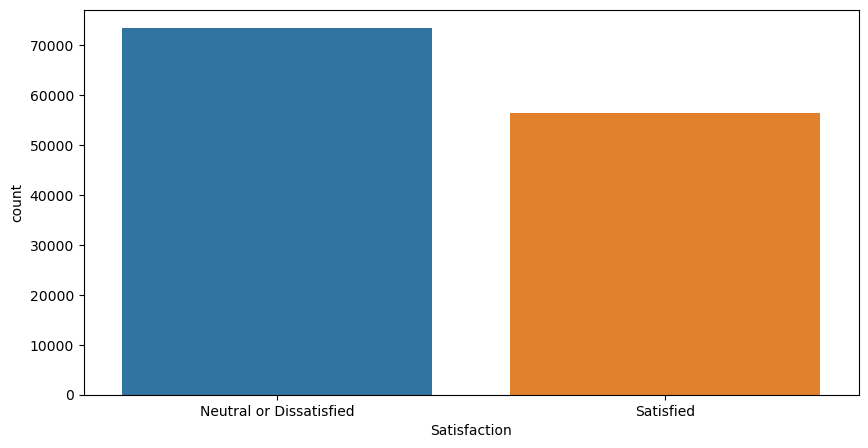

In [8]:
# Plot count plot for the target

plt.figure(figsize=(10,5))
sns.countplot(x='Satisfaction', data=df)
plt.show()

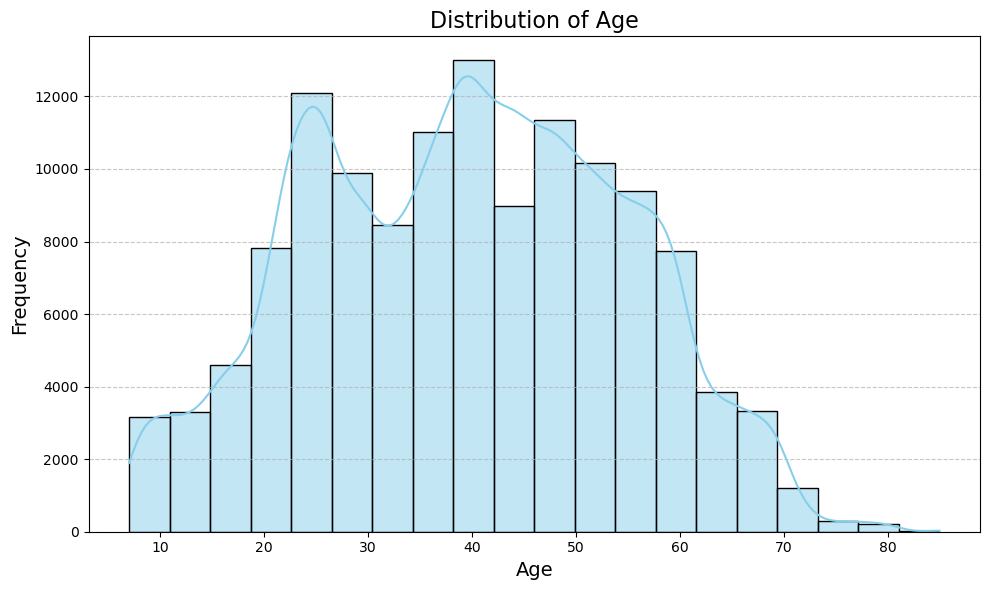

In [9]:
# Plot histogram for Age

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The age distribution within a population is shown by histogram. Most people are in the 20–60 age range, with a peak around age 40. The number of passengers above 60 declines significantly, indicating a younger passenger demographic

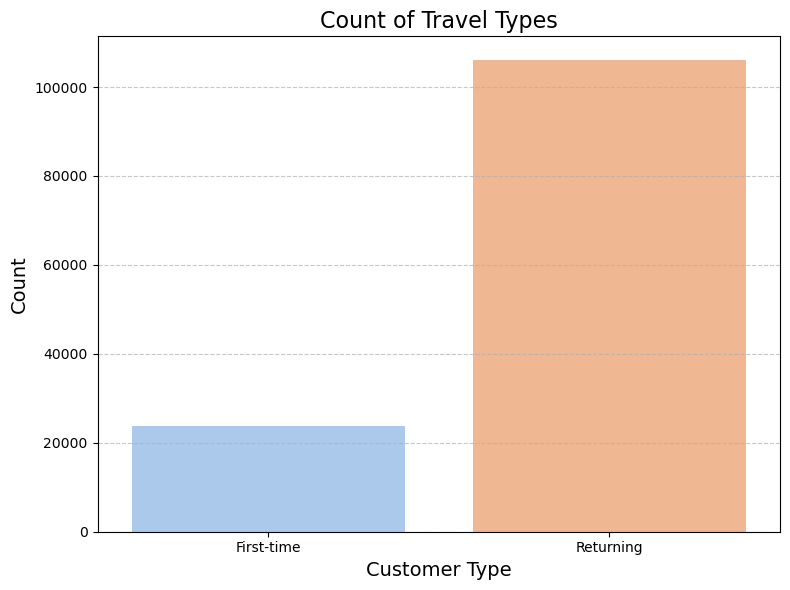

In [10]:
# Plot of Travel Types

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Customer Type', palette='pastel')
plt.title('Count of Travel Types', fontsize=16)
plt.xlabel('Customer Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The number of travel categories is seen in the bar chart, with business travel far outnumbering leisure travel. This implies that the information most likely comes from a business-oriented dataset, where travel is mostly done for work-related reasons. The discrepancy in numbers emphasises how important business travel is to this dataset

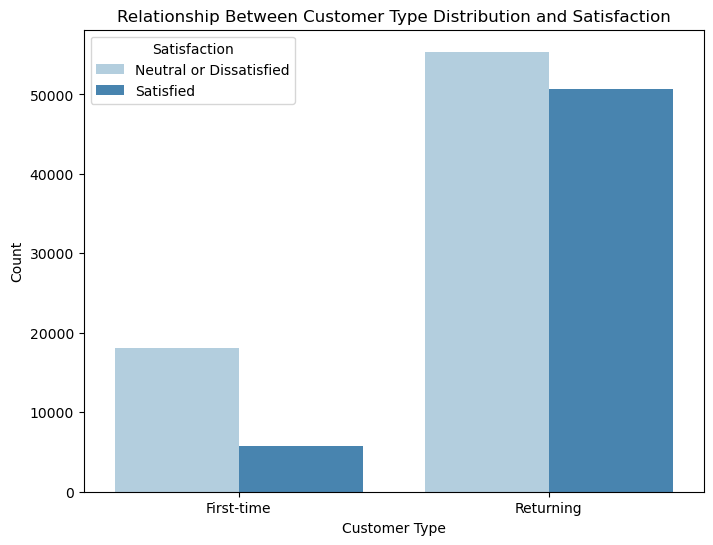

In [11]:
# Plot of Relationship Between Customer Type Distribution and Satisfaction 

plt.figure(figsize=(8, 6))
sns.countplot(x='Customer Type', hue='Satisfaction', data=df, palette='Blues')
plt.title('Relationship Between Customer Type Distribution and Satisfaction')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()

The bar chart displaying the distribution of customers by type—first-time vs. returning customers—reveals a clear disparity between the two groups. Returning customers significantly outnumber first-time customers, which underscores a strong trend of customer retention. This suggests that the company has been relatively successful in fostering loyalty among its customer base.
When examining satisfaction levels within each customer type, the chart shows that both first-time and repeat customers are more likely to report being dissatisfied than satisfied. Despite the higher count of repeat customers overall, the dissatisfaction bar is notably taller than the satisfaction bar for both customer groups. This indicates that while the company has been effective at retaining customers, a substantial portion of its clientele remains dissatisfied


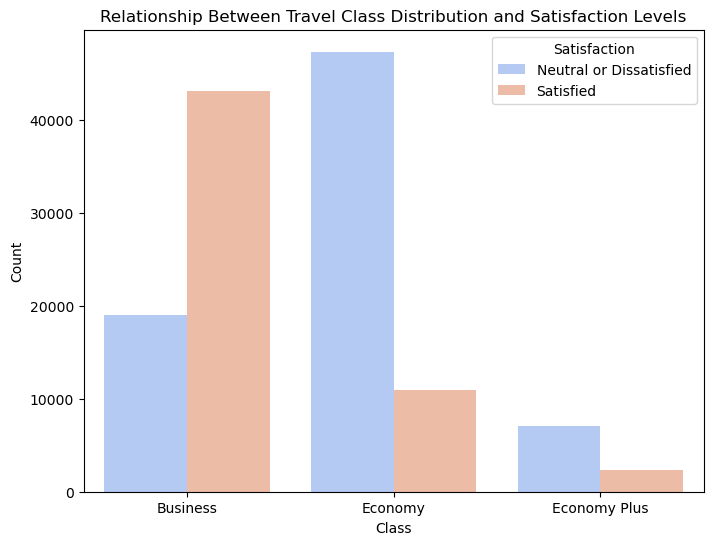

In [12]:
# Plot of Relationship Between Travel Class Distribution and Satisfaction Levels

plt.figure(figsize=(8, 6))
sns.countplot(x='Class', hue='Satisfaction', data=df, palette='coolwarm')
plt.title('Relationship Between Travel Class Distribution and Satisfaction Levels')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

The bar chart illustrates the distribution of passengers across the three travel classes: Business, Economy, and Economy Plus. It is evident that most passengers travel in the Economy class, significantly outnumbering those in Business and Economy Plus. This highlights a clear preference for the most affordable travel option among customers.
When examining satisfaction levels, a striking trend emerges: Business class passengers report the highest levels of satisfaction, with a substantial proportion of customers expressing contentment. This suggests that the premium services and amenities associated with Business class are effectively meeting or exceeding customer expectations.
On the other hand, Economy class exhibits the highest number of dissatisfied passengers, indicating that this segment may face challenges related to service quality, comfort, or other factors that impact the overall travel experience. These results underline the importance of addressing customer pain points in the Economy class to improve satisfaction levels, while continuing to maintain the high standards that Business class passengers already enjoy


In [13]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# Initialize LabelEncoder for general object columns
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    if col != 'Class':  # Exclude 'Class' for now
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Initialize OrdinalEncoder for the 'Class' column
# Define the order of classes
class_order = ['Economy', 'Business', 'Economy Plus']
ordinal_encoder = OrdinalEncoder(categories=[class_order])

# Apply OrdinalEncoder to the 'Class' column
df['Class'] = ordinal_encoder.fit_transform(df[['Class']])

# Show the first few rows of the processed DataFrame
df.head()


,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,48,0,0,1.0,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,0
1,0,35,1,0,1.0,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,1
2,1,41,1,0,1.0,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,1
3,1,50,1,0,1.0,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,1
4,0,49,1,0,1.0,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,1


In [14]:
# Statistical summary
df.describe()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,0.492616,39.427957,0.816908,0.309416,0.623514,1190.316392,14.713713,15.091129,3.057599,2.756876,...,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114,0.434463
std,0.499947,15.119360,0.386743,0.462255,0.616170,997.452477,38.071126,38.407410,1.526741,1.401740,...,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025,0.495688
min,0.000000,7.000000,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,27.000000,1.000000,0.000000,0.000000,414.000000,0.000000,0.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,0.000000
50%,0.000000,40.000000,1.000000,0.000000,1.000000,844.000000,0.000000,0.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,0.000000
75%,1.000000,51.000000,1.000000,1.000000,1.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,...,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,1.000000
max,1.000000,85.000000,1.000000,1.000000,2.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [15]:
# Correlation matrix for numerical features
print("\nCorrelation Matrix:")
correlation_matrix = df.corr()
correlation_matrix



Correlation Matrix:


,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
Gender,1.000000,0.008996,0.030958,0.009503,-0.002651,0.003616,0.003491,0.001307,0.008995,0.005893,...,0.006447,-0.030756,0.031047,0.002867,0.001730,0.038504,0.005901,0.003843,0.036356,0.011236
Age,0.008996,1.000000,0.284172,-0.044808,0.101599,0.099459,-0.009041,-0.011229,0.036960,0.022565,...,0.057078,0.159136,0.039119,0.052565,0.023194,-0.051347,0.016116,0.074947,-0.047991,0.134091
Customer Type,0.030958,0.284172,1.000000,0.308236,0.121685,0.226021,-0.003859,-0.004724,0.206873,0.018059,...,0.054172,0.156239,0.046841,0.081302,0.056997,-0.023292,0.005757,0.106001,-0.024874,0.186017
Type of Travel,0.009503,-0.044808,0.308236,1.000000,-0.361315,-0.266792,-0.005913,-0.005820,0.257102,-0.134078,...,-0.059794,-0.127717,-0.139612,-0.084615,-0.068986,-0.023538,-0.105865,-0.152936,-0.033012,-0.449861
Class,-0.002651,0.101599,0.121685,-0.361315,1.000000,0.273768,-0.005820,-0.007741,-0.052680,0.072062,...,0.117375,0.141085,0.121527,0.085643,0.056422,0.082874,0.032428,0.121882,0.084102,0.318144
Flight Distance,0.003616,0.099459,0.226021,-0.266792,0.273768,1.000000,0.002402,-0.001932,-0.018914,0.065165,...,0.111194,0.157662,0.134533,0.095648,0.057066,0.059316,0.006701,0.130507,0.064855,0.298085
Departure Delay,0.003491,-0.009041,-0.003859,-0.005913,-0.005820,0.002402,1.000000,0.960329,0.000778,-0.005318,...,-0.030486,-0.027999,0.014574,-0.014543,-0.029164,-0.054432,-0.015946,-0.027012,-0.004105,-0.050740
Arrival Delay,0.001307,-0.011229,-0.004724,-0.005820,-0.007741,-0.001932,0.960329,1.000000,-0.000941,-0.007022,...,-0.034735,-0.030472,0.011327,-0.016520,-0.031666,-0.059759,-0.017721,-0.030187,-0.007923,-0.058187
Departure and Arrival Time Convenience,0.008995,0.036960,0.206873,0.257102,-0.052680,-0.018914,0.000778,-0.000941,1.000000,0.437620,...,0.067297,0.008666,0.010617,0.009862,0.000687,0.072195,0.344915,-0.008380,0.070833,-0.054270
Ease of Online Booking,0.005893,0.022565,0.018059,-0.134078,0.072062,0.065165,-0.005318,-0.007022,0.437620,1.000000,...,0.039064,0.028561,0.109450,0.015125,0.030514,0.035373,0.714807,0.046564,0.039148,0.168877


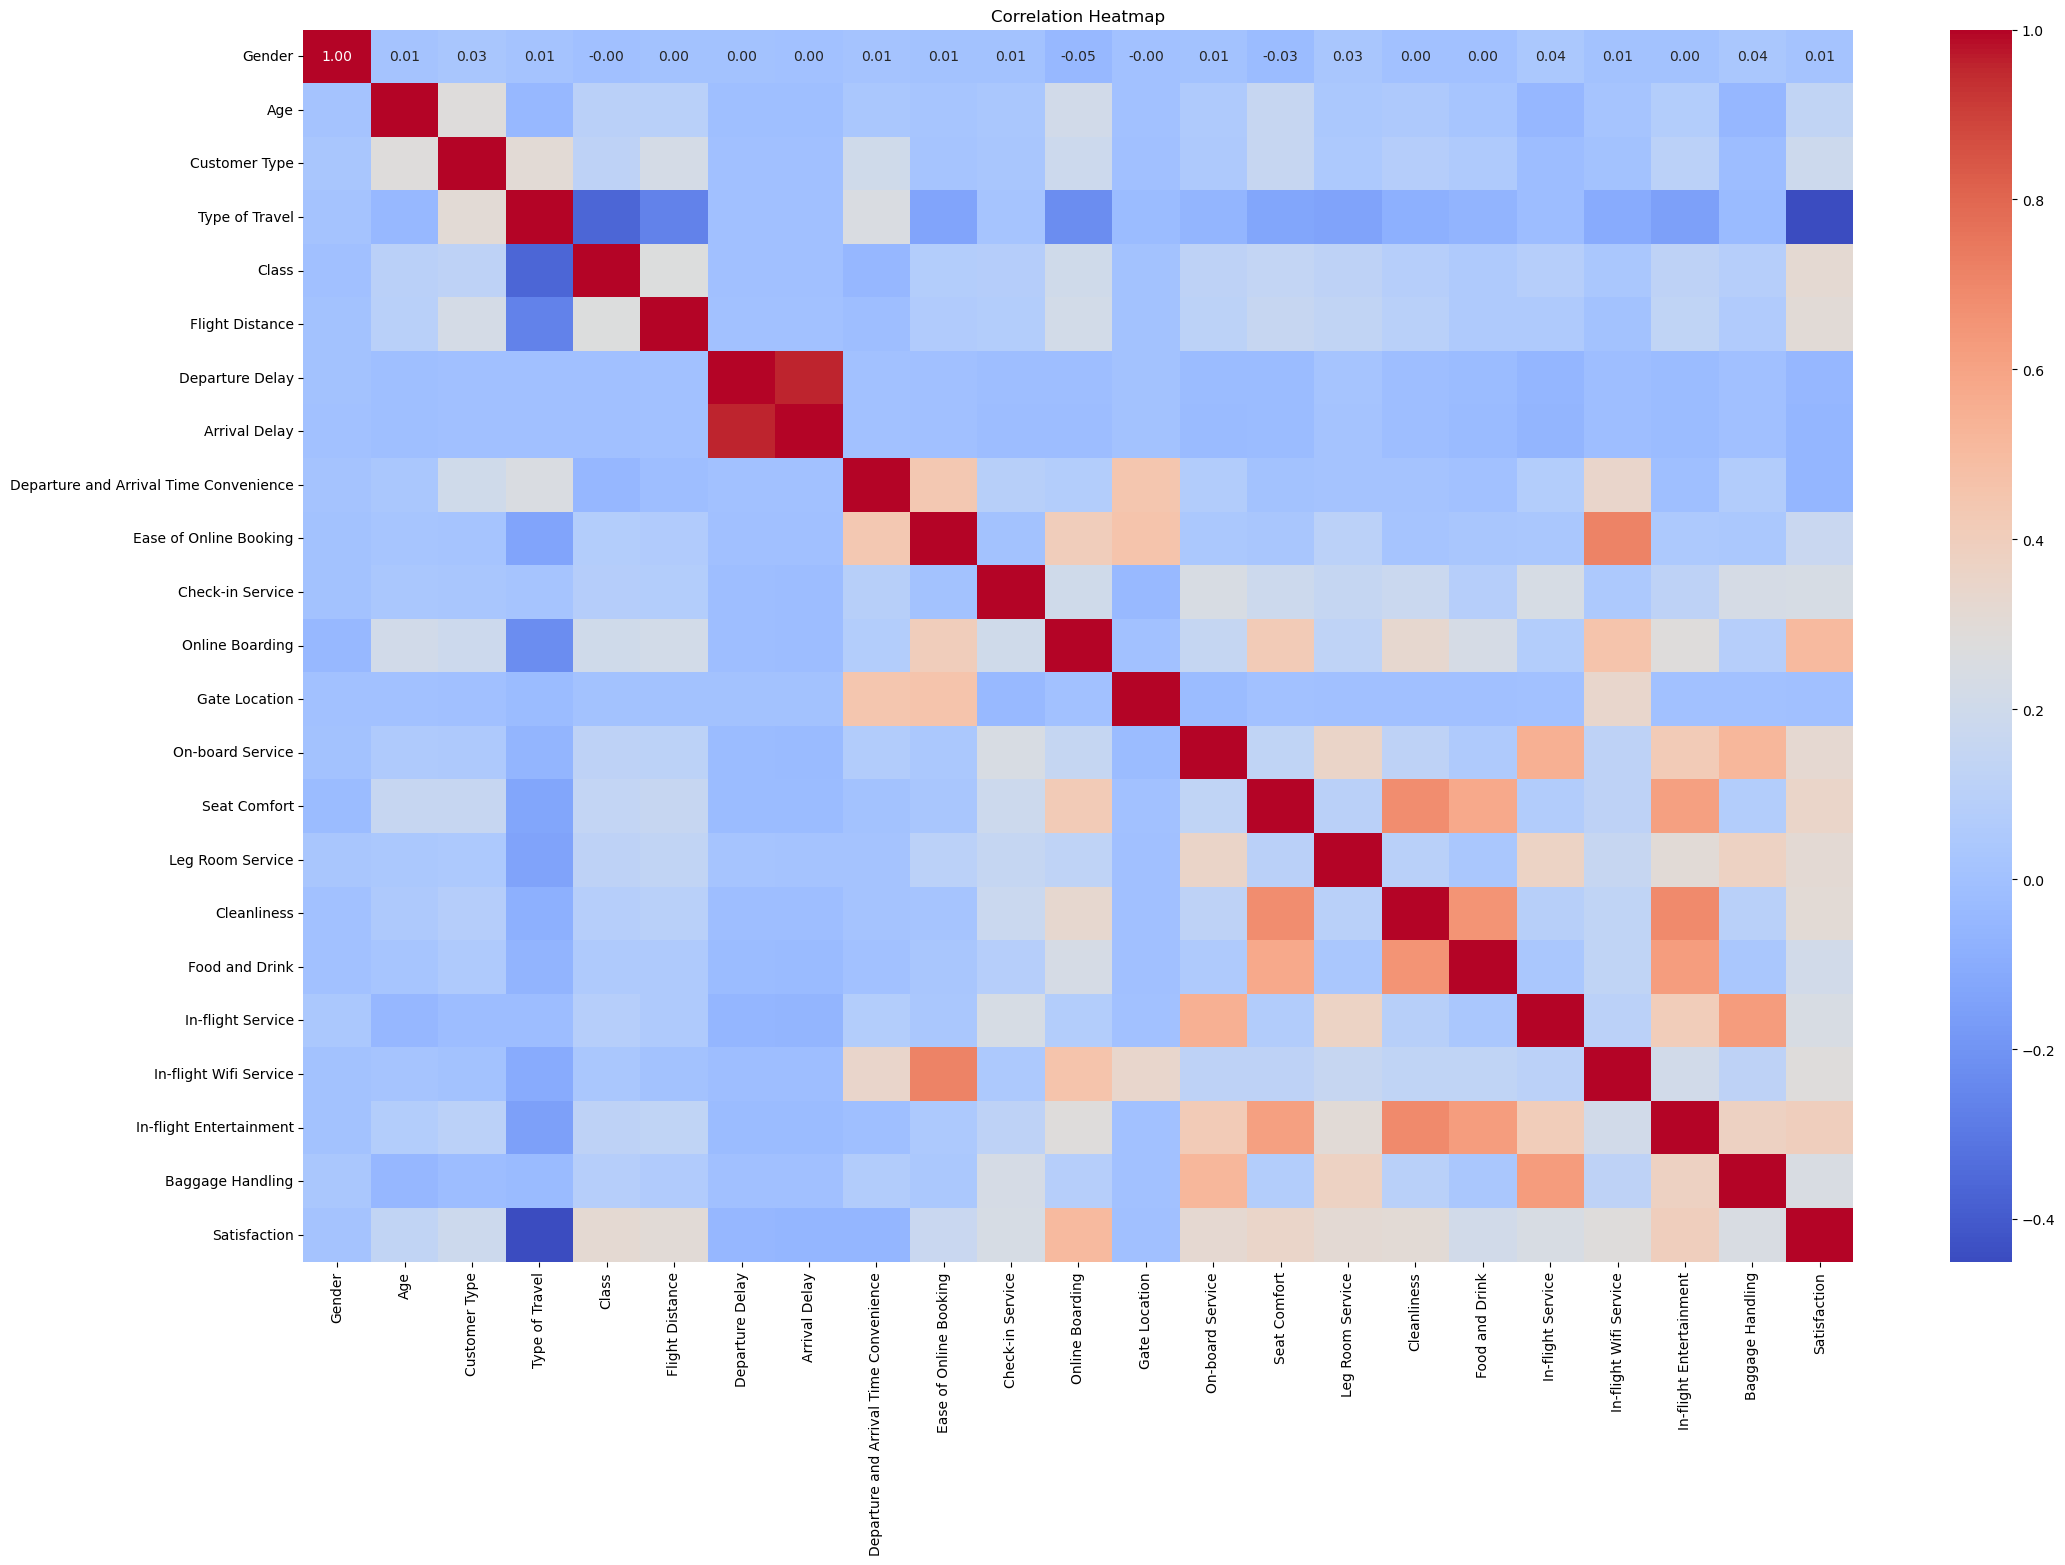

In [16]:
# Display the correlation matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(25, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

The heatmap provides a visual representation of the pairwise correlations between numerical features in your dataset, using Pearson’s correlation coefficient. The diagonal elements of the heatmap are all 1.0, as each feature is perfectly correlated with itself. The colour scale ranges from dark red (high positive correlation) to dark blue (high negative correlation), with white/light colours indicating weak or no correlation.

One of the most notable correlations is the strong positive relationship between Departure Delay and Arrival Delay, with a correlation coefficient of 0.96. This indicates that flights that experience delays during departure are highly likely to also have delays upon arrival. This makes sense, as delayed takeoff often leads to a later arrival.

On the other hand, there is a moderate negative correlation between Type of Travel and Satisfaction (correlation = -0.45). This suggests that the type of travel, possibly distinguishing between business and leisure, negatively impacts satisfaction. It may imply that business travellers experience more dissatisfaction, or that other factors related to travel purpose are influencing overall satisfaction in a less positive way.

Regarding the Satisfaction column, features such as Online Boarding (correlation = 0.50), Seat Comfort (correlation = 0.35), and In-flight Entertainment (correlation = 0.40) show moderate positive correlations with satisfaction. This suggests that improvements in these areas could significantly enhance customer satisfaction and should be prioritised for improvement.

Finally, there are variables like Gender, which show little to no correlation with other features in the dataset, suggesting that gender does not have a meaningful influence on most outcomes here. This insight could help refine feature selection in predictive modelling, ensuring that features contributing little to model performance are excluded, thereby improving model efficiency and accuracy.

Overall, the heatmap provides a clear understanding of the relationships between different factors, highlighting the importance of certain variables for customer satisfaction and providing insights into which variables might be more relevant for predictive modelling.

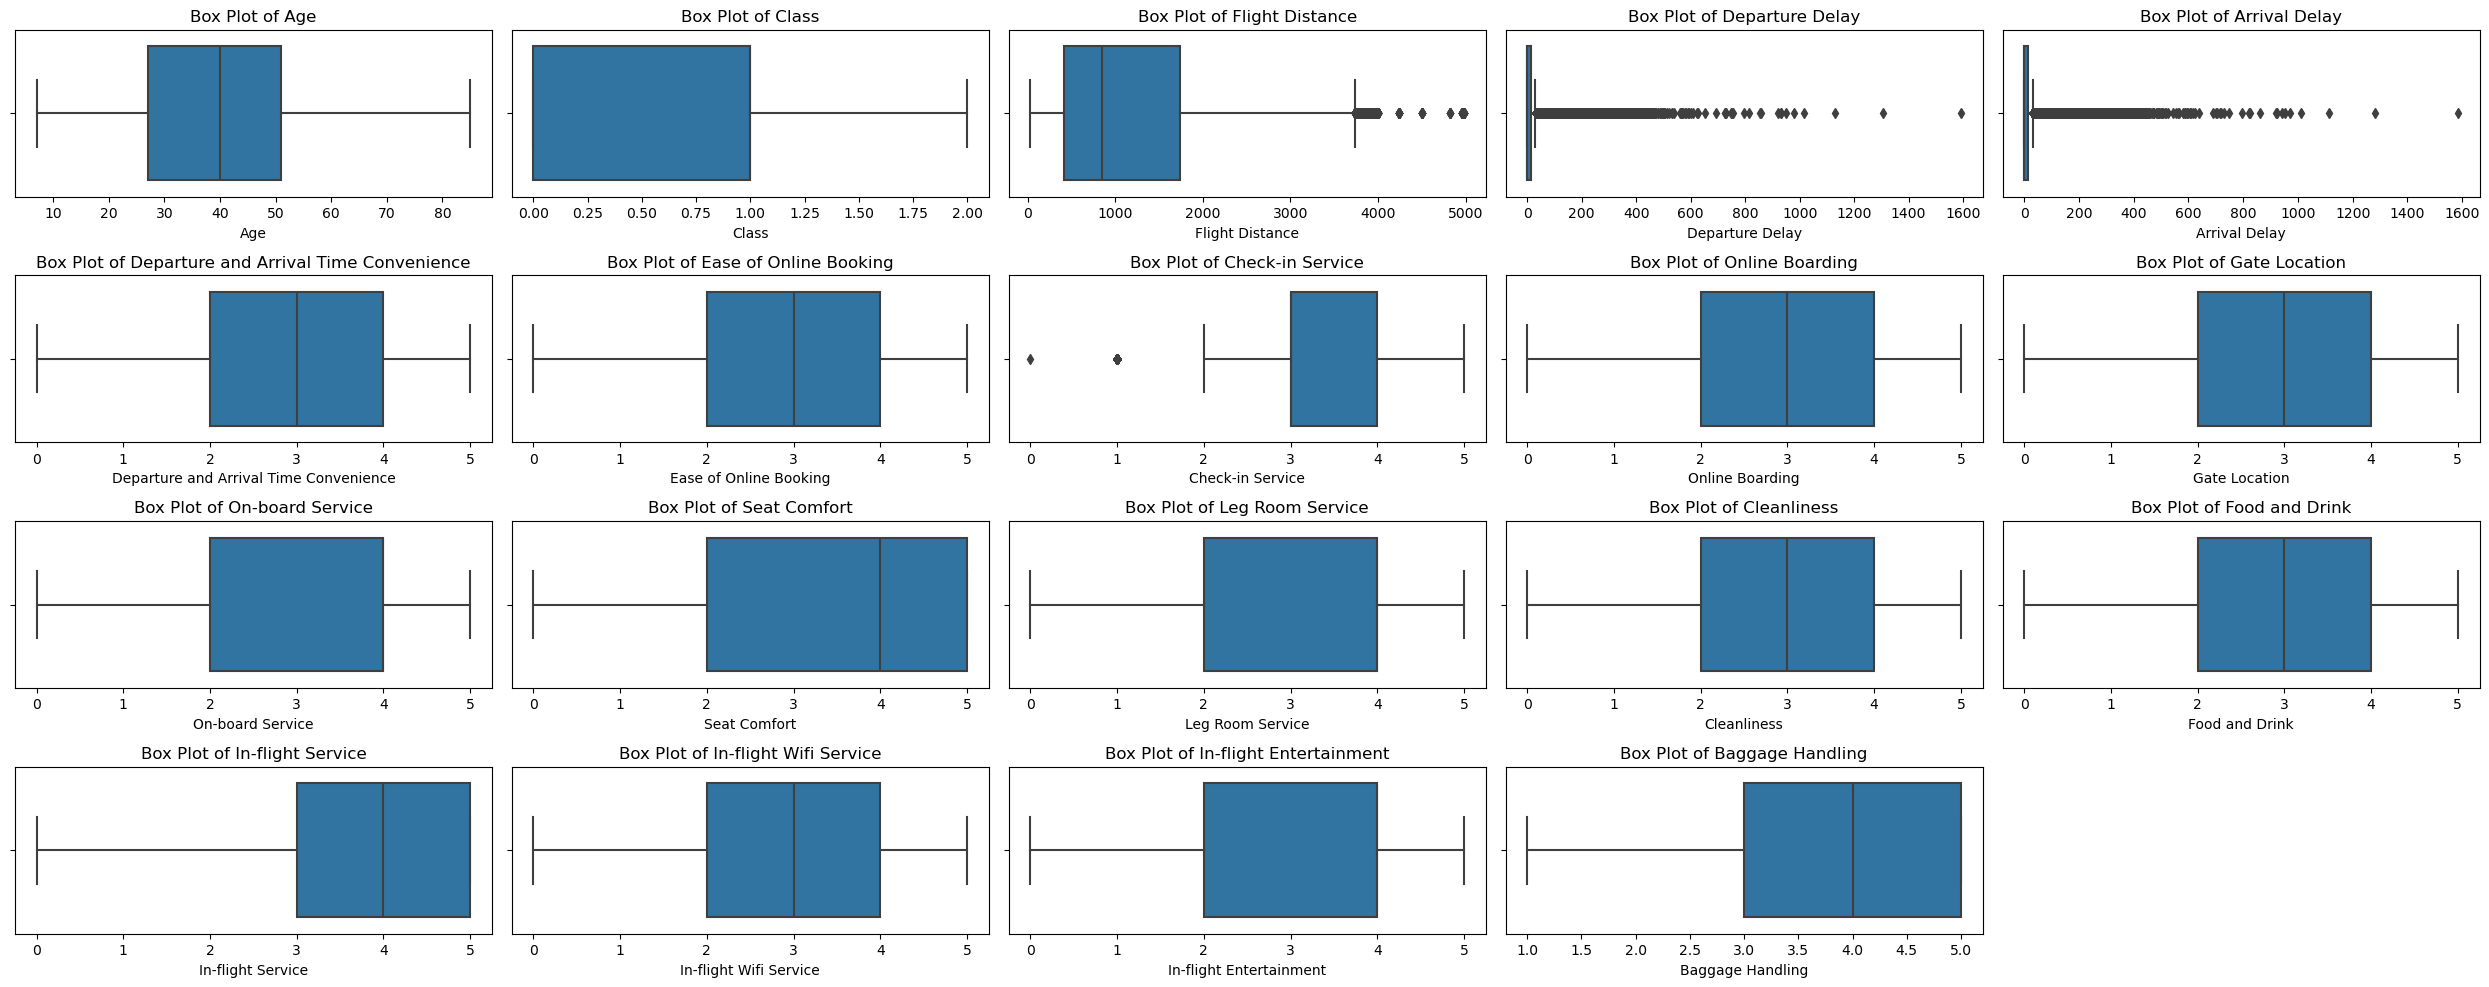

In [17]:
# Create box plots for each numerical column to check for outliers
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(25, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()

plt.show()


The box plots reveal the distribution and potential outliers in various features of the dataset. The Gender feature is evenly split between male and female categories. Age is mostly concentrated in the 30-40 range, with a few older outliers. Customer Type has a noticeable outlier at 0, indicating fewer customers in that category. Type of Travel and Class show no significant outliers, suggesting they are categorical features. Flight Distance has visible outliers, suggesting the presence of long-haul flights. Departure Delay and Arrival Delay show numerous outliers, particularly in arrival times, indicating extreme delays. Service-related features, such as Check-in Service, Online Boarding, and In-flight Service, show balanced distributions, with most values around the middle range. Seat Comfort, Leg Room Service, and Cleanliness follow a similar trend, reflecting positive customer experiences. Baggage Handling and Satisfaction show slight skewness, with Satisfaction having a generally positive distribution.

The most notable outliers are found in Flight Distance, Departure Delay, and Arrival Delay, which may require additional cleaning or analysis. The service-related features display consistent customer experiences with few outliers, while the Satisfaction feature shows a relatively high level of satisfaction among customers, with only a few dissatisfied individuals. This analysis helps identify which features might need further treatment or investigation, particularly those with significant outliers.

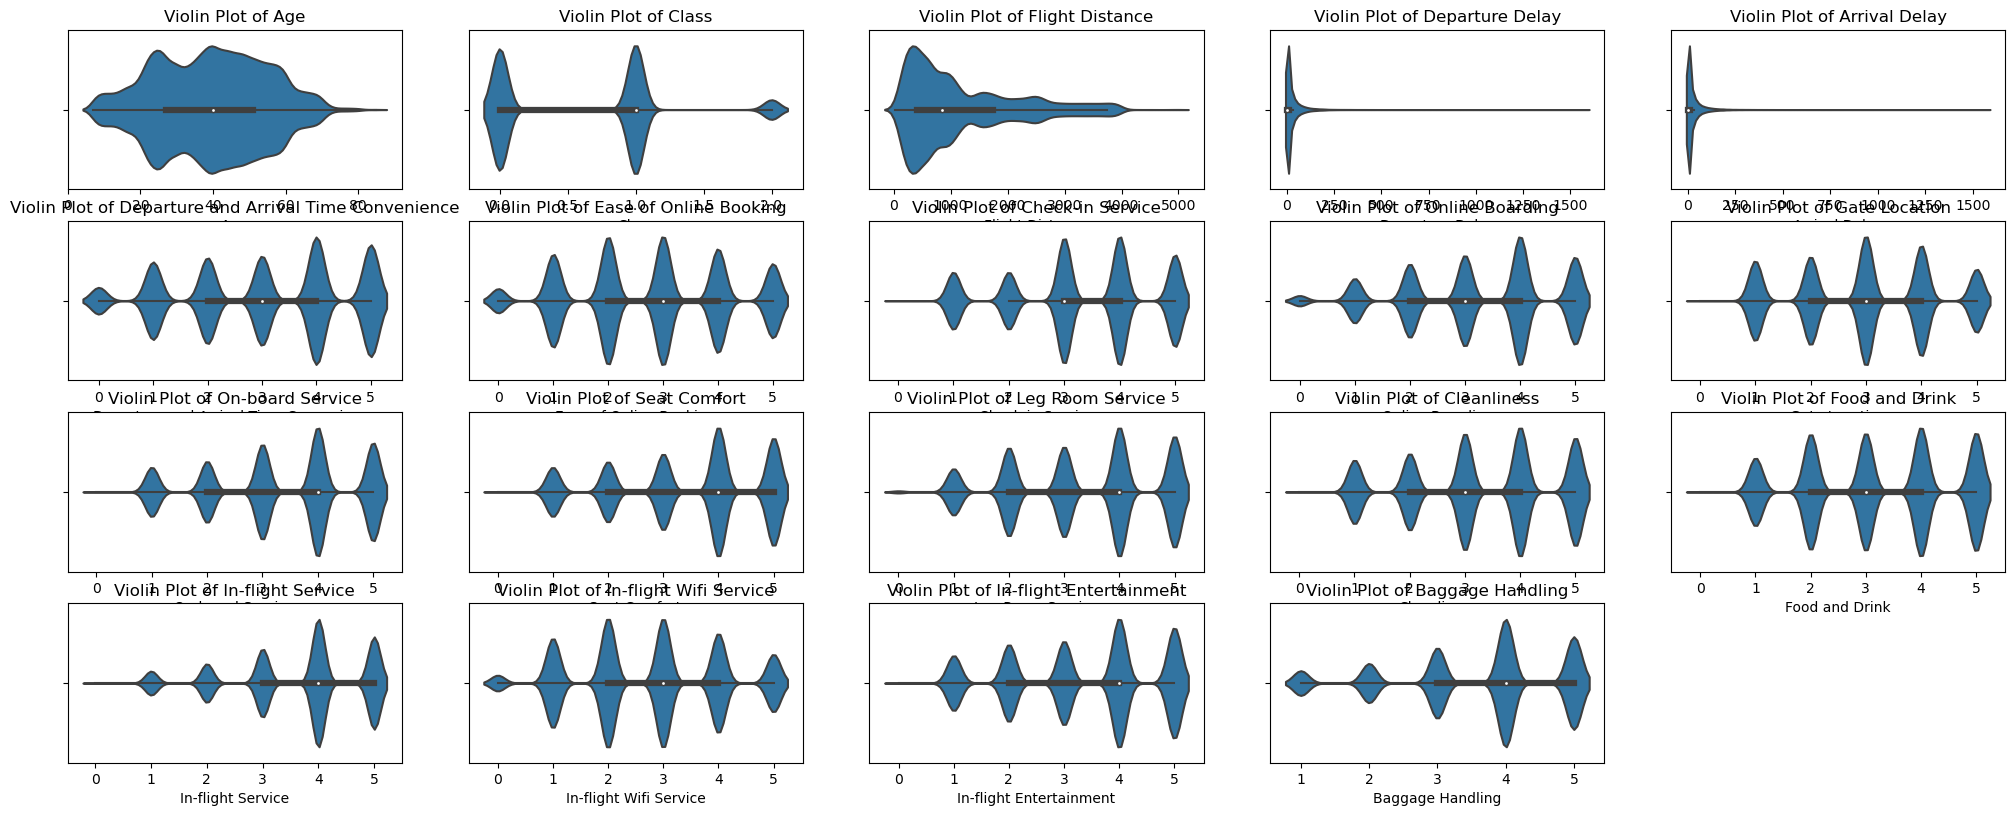

In [18]:
# plot variation graph

plt.figure(figsize=(25, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 5, i)
    sns.violinplot(x=df[col])
    plt.title(f'Violin Plot of {col}')
    plt.tight_layout

In [19]:
# Split data to X and y

X = df.drop('Satisfaction', axis=1)
y = df['Satisfaction']

In [20]:
X.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,1,48,0,0,1.0,821,2,5.0,3,3,...,3,3,5,2,5,5,5,3,5,5
1,0,35,1,0,1.0,821,26,39.0,2,2,...,2,5,4,5,5,3,5,2,5,5
2,1,41,1,0,1.0,853,0,0.0,4,4,...,4,3,5,3,5,5,3,4,3,3
3,1,50,1,0,1.0,1905,0,0.0,2,2,...,2,5,5,5,4,4,5,2,5,5
4,0,49,1,0,1.0,3470,0,1.0,3,3,...,3,3,4,4,5,4,3,3,3,3


# Feature Importance

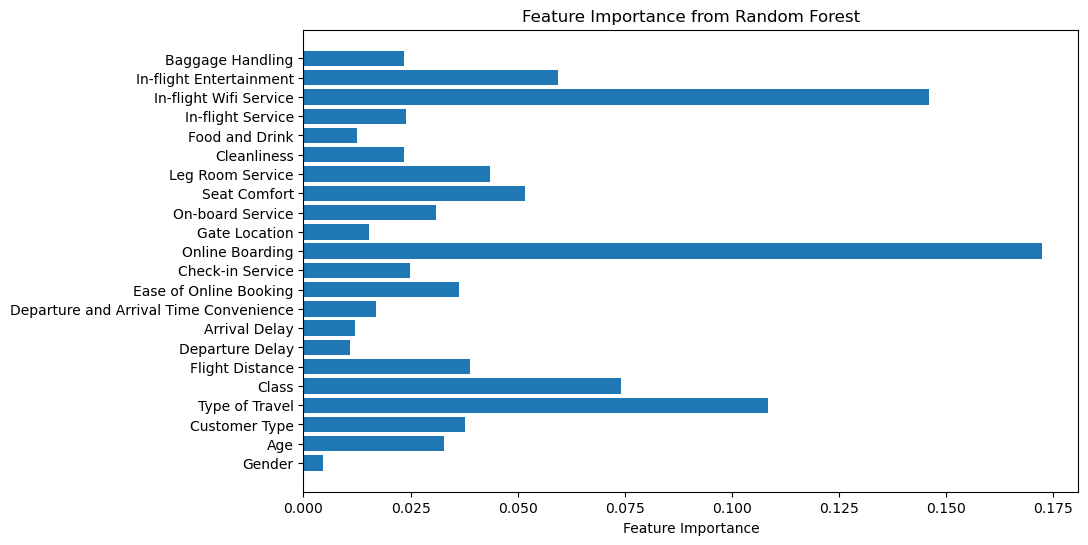

In [21]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming you have a dataset X and labels y
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importance
importance = model.feature_importances_

# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()


In [22]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance

,Feature,Importance
0,Gender,0.004524
1,Age,0.032698
2,Customer Type,0.037669
3,Type of Travel,0.108346
4,Class,0.074005
5,Flight Distance,0.038927
6,Departure Delay,0.010950
7,Arrival Delay,0.011994
8,Departure and Arrival Time Convenience,0.016969
9,Ease of Online Booking,0.036334


# Splitting Dataset to Train and Test

In [23]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the split datasets
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (103904, 22)
Testing data shape: (25976, 22)


# Feature Scaling

In [24]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shape of the scaled data
print(f"Scaled training data shape: {X_train_scaled.shape}")
print(f"Scaled testing data shape: {X_test_scaled.shape}")


Scaled training data shape: (103904, 22)
Scaled testing data shape: (25976, 22)


# **Satisfaction Prediction**

# Machine Learning Modeling

In [25]:
# Importing the required libraries
#!pip install xgboost

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Logistic Regression

In [26]:
# Initialize Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)

# Train the model
log_reg_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_log_reg = log_reg_model.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_log_reg))
print("Logistic Regression Classification Report: \n", classification_report(y_test, y_pred_log_reg))
print("Logistic Regression Confusion Matrix: \n", confusion_matrix(y_test, y_pred_log_reg))


Logistic Regression Accuracy:  0.87091931013243
Logistic Regression Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89     14723
           1       0.86      0.83      0.85     11253

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976

Logistic Regression Confusion Matrix: 
 [[13246  1477]
 [ 1876  9377]]


## Random Forest Classifier

In [27]:
# Initialize Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report: \n", classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix: \n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy:  0.9624268555589776
Random Forest Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14723
           1       0.97      0.94      0.96     11253

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Random Forest Confusion Matrix: 
 [[14412   311]
 [  665 10588]]


## XGBoost Classifier

In [28]:
# Initialize XGBoost Classifier model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model
print("XGBoost Accuracy: ", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report: \n", classification_report(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix: \n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Accuracy:  0.963658761934093
XGBoost Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14723
           1       0.97      0.95      0.96     11253

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

XGBoost Confusion Matrix: 
 [[14394   329]
 [  615 10638]]


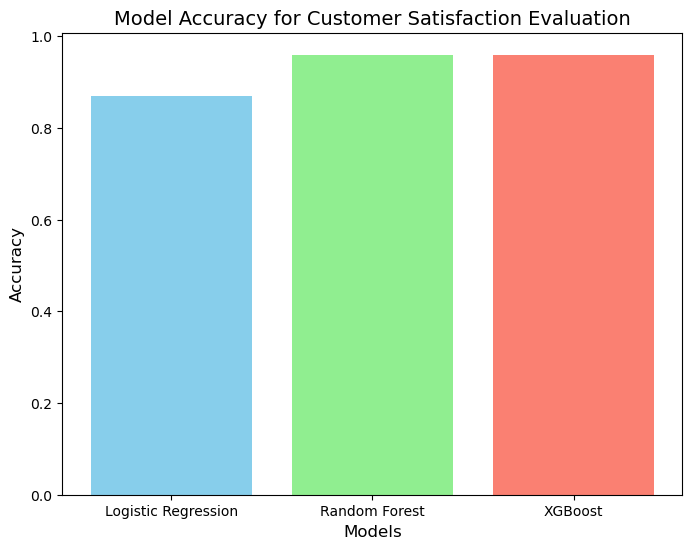

In [29]:
# Example accuracy values for each model
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [0.87, 0.96, 0.96]  # Replace these with your actual accuracy scores

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon'])

# Adding title and labels
plt.title('Model Accuracy for Customer Satisfaction Evaluation', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Display the plot
plt.show()


# AUC and ROC Curve Evaluation

In [30]:
from sklearn.metrics import roc_curve, auc


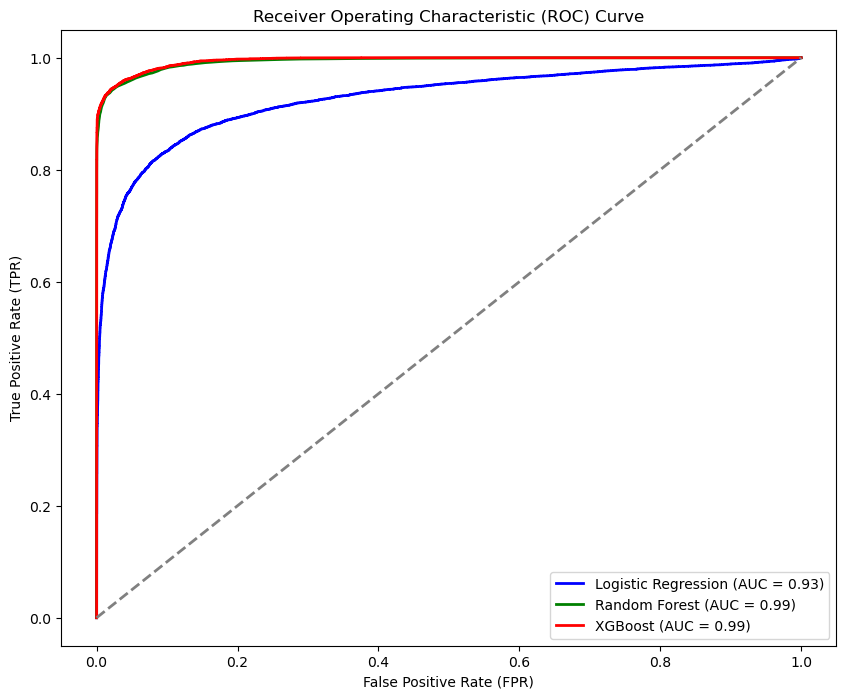

In [31]:


# Get probability predictions for Logistic Regression
y_prob_log_reg = log_reg_model.predict_proba(X_test_scaled)[:, 1]
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_prob_log_reg)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

# Get probability predictions for Random Forest
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Get probability predictions for XGBoost
y_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

# Labels and title
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')

# Display the plot
plt.show()


# Retention

In [32]:
# List of columns to be aggregated for customer ratings
rating_columns = [
    'Departure and Arrival Time Convenience',
    'Ease of Online Booking',
    'Check-in Service',
    'Online Boarding',
    'Gate Location',
    'On-board Service',
    'Seat Comfort',
    'Leg Room Service',
    'Cleanliness',
    'Food and Drink',
    'In-flight Service',
    'In-flight Wifi Service',
    'In-flight Entertainment',
    'Baggage Handling'
]

# Assuming your data is in a pandas DataFrame called `df`

# Compute the mean rating for each customer
df['mean_rating'] = df[rating_columns].mean(axis=1)

# Get the highest and lowest mean ratings
highest_mean_rating = df['mean_rating'].max()
lowest_mean_rating = df['mean_rating'].min()

# Print the results
print(f"Highest Mean Rating: {highest_mean_rating}")
print(f"Lowest Mean Rating: {lowest_mean_rating}")


Highest Mean Rating: 5.0
Lowest Mean Rating: 1.0714285714285714


In [33]:
# Compute the 75th percentile of the mean_rating
threshold = df['mean_rating'].quantile(0.75)

# Classify customers as retained or not based on the new threshold
df['retained'] = (df['mean_rating'] >= threshold).astype(int)

# Print the updated threshold and the first few rows
print(f"New Threshold (75th Percentile): {threshold}")
print(df[['mean_rating', 'retained']].head())


New Threshold (75th Percentile): 3.7142857142857144
   mean_rating  retained
0     3.857143         1
1     3.785714         1
2     3.928571         1
3     3.785714         1
4     3.500000         0


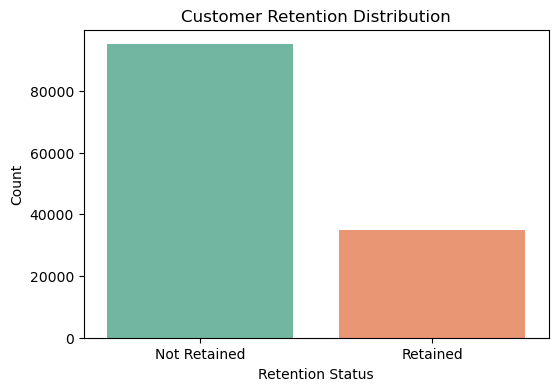

In [34]:
# Plot the distribution of the 'retained' column
plt.figure(figsize=(6, 4))
sns.countplot(x='retained', data=df, palette='Set2')

# Add title and labels
plt.title('Customer Retention Distribution')
plt.xlabel('Retention Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Retained', 'Retained'])

# Show the plot
plt.show()


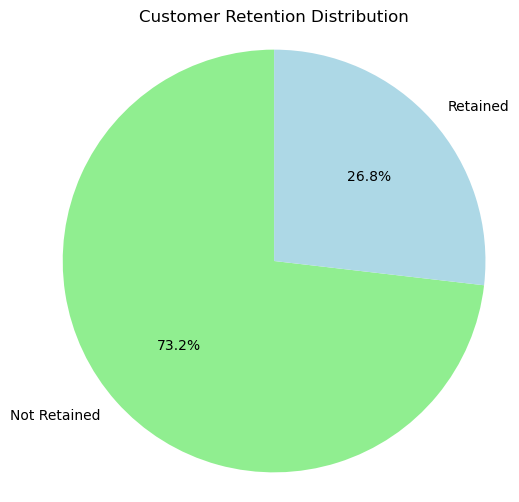

In [35]:
# Count the occurrences of each category in the 'retained' column
retained_counts = df['retained'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(retained_counts, labels=['Not Retained', 'Retained'], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightblue'])

# Add a title
plt.title('Customer Retention Distribution')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()


The pie chart represents the distribution of customer retention based on the "retained" column. It shows the proportion of customers who have been classified as "retained" versus those who have not been retained. The chart clearly indicates that 73.2% of customers are categorized as Not Retained, while 26.8% are Retained.

This provides a clear visual indication of how the customer base is split between those who stayed and those who didn't, based on the calculated mean rating across various customer service features. The chart uses different colors to distinguish between the two categories, with light green for retained customers and light blue for non-retained ones.
